## Tema 3: Naive-bayes y KNN Aprendizaje automático

### Autor: José Miguel

### Prácticas Naive Bayes y KNN (ejercicio 3)

##### **3. En este [enlace](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) puedes descargar un dataset que recoge diferentes características de vino rojo portugués "Vinho Verde" y la calidad del mismo. Crea un modelo de clasificación usando NaiveBayes (GaussianNB) y KNN.**


### 1. Carga de datos desde el csv
Cargaremos las librerías fundamentales como numpy y pandas y cargaremos los datos en datasets.

In [1]:
import pandas as pd
import numpy as np
df_data = pd.read_csv('csv/winequality-red.csv')
df_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. Preprocesamiento de datos
#### Correlación de datos para ver si podemos eliminar alguna columna

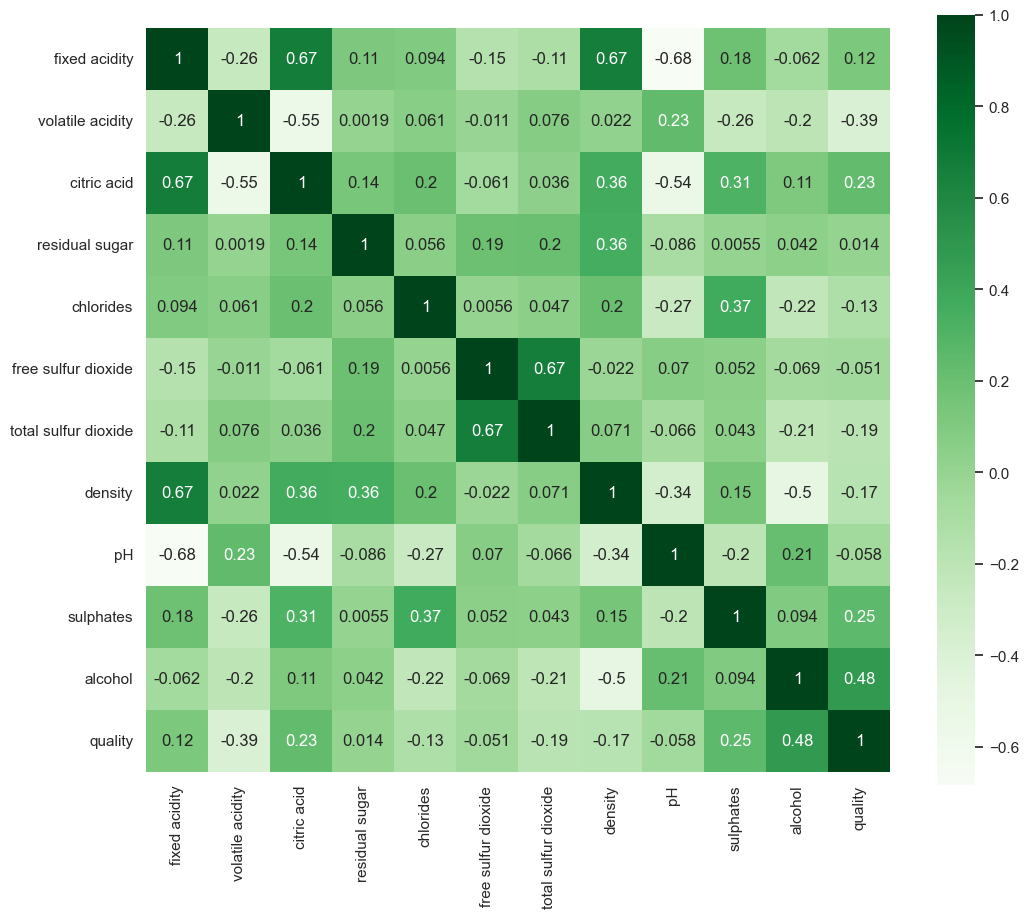

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()
# Crear una figura y ejes más grandes
# con plt.figure(figsize=(15,7)) se puede tambien aumentar el tamaño
fig, ax = plt.subplots(figsize=(12, 10)) # fig (la figura) y ax (el conjunto de ejes o subgráficos).

# Crear el mapa de calor
sns.heatmap(df_data.corr(), square=True, annot=True, cmap='Greens', ax=ax)

# Mostrar el gráfico
plt.show()

#### 3. Remodelar columnas para quitar espacios en el nombre

In [3]:
# devuelva una lista del nombre de las columnas
columns_names = df_data.columns.tolist()

# quitar el espacio en blanco y asignarlo nuevamente
columns_names = [c.replace(' ', '_') for c in columns_names]
df_data.columns = columns_names

df_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### 4. Crear los entrenamientos, y el test

In [4]:
# Dividiremos el df_final en un conjunto de datos de test y entrenamiento
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.33

X = df_data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
                    'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = df_data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

#### 5. Construcción y análisis de los modelos y matriz de consfusión.

#### 5.1 NaiveBayes Modelo GaussianNB()

In [5]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred)) 

accuracy = model.score(X_test, y_test) # precisión del modelo
print(f"Precisión del modelo {accuracy}")

              precision    recall  f1-score   support

           3       0.50      0.50      0.50         2
           4       0.12      0.11      0.11        19
           5       0.68      0.63      0.65       217
           6       0.53      0.56      0.54       213
           7       0.40      0.44      0.42        70
           8       0.00      0.00      0.00         7

    accuracy                           0.55       528
   macro avg       0.37      0.37      0.37       528
weighted avg       0.55      0.55      0.55       528

Precisión del modelo 0.5473484848484849


#### 5.2. KNN Modelo KNeighborsClassifier() K vecinos más cercanos.

Max Value uniform : 0.5490415127146273 (1)
Max Value distance : 0.6199826124755488 (21)


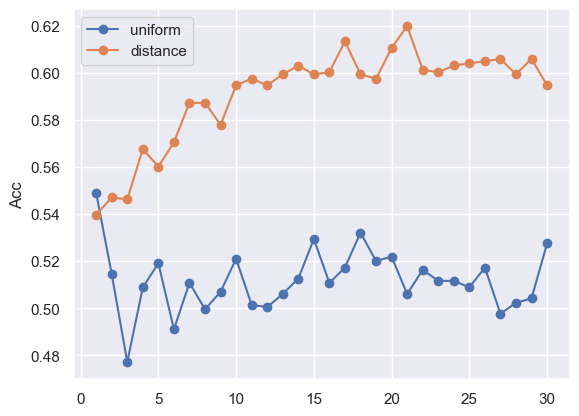

In [6]:
# si quiero saber la distribución de los datos, como puedo poner los 11 atributos en un gráfico? scatter preguntar a rafa

from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

MIN_NEIGHBORDS = 1
MAX_NEIGHBORDS = 30
N_SPLITS = 5

cv = KFold(N_SPLITS, shuffle=True)
train = pd.concat([X_train, y_train], axis=1)

for i, weights in enumerate(['uniform', 'distance']): 
    total_scores = []
    
    for n_neighbors in range(MIN_NEIGHBORDS, MAX_NEIGHBORDS+1):
        fold_accuracy = []
        knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        
        for train_fold, test_fold in cv.split(train):
            # División train test aleatoria
            f_train = train.iloc[train_fold]
            f_test = train.iloc[test_fold]
            
            """
            - indexación basada en ubicación (posición)
            iloc los índices son tratados como ubicaciones numéricas, por lo que puedes acceder a las filas 
            y columnas utilizando índices enteros.
            - indexación basada en etiquetas (nombres)
            loc las etiquetas son tratadas como nombres, por lo que puedes acceder a las filas y columnas 
            utilizando etiquetas de índice o nombres de columnas.
            """

            # aqui he tenido que usar ioc sino me daba error de indexación
            # Entrenamiento y ejecución del modelo
            knn.fit(X=f_train.drop(['quality'], axis=1), y=f_train['quality'])
            y_pred = knn.predict(X=f_test.drop(['quality'], axis=1))
            
            # Evaluación del modelo
            acc = accuracy_score(f_test['quality'], y_pred)
            fold_accuracy.append(acc)
            
        total_scores.append(sum(fold_accuracy) / len(fold_accuracy))
        
    plt.plot(range(1, len(total_scores) + 1), total_scores, marker='o', label=weights)
    
    print('Max Value ' + weights + " : " + str(max(total_scores)) + " (" + str(np.argmax(total_scores) + 1) + ")")
    
plt.ylabel('Acc')
plt.legend()
plt.show()

In [7]:
# Seleccionamos la mejor parametrización obtenida con la distancia como peso 
N_NEIGHBORS = 3
WEIGHTS = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors = N_NEIGHBORS, weights = WEIGHTS)

# fit and predict
knn.fit(X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)
acc = accuracy_score(y_test, y_pred)
print('Acc', acc)

Acc 0.5416666666666666


#### Matriz de Confusión

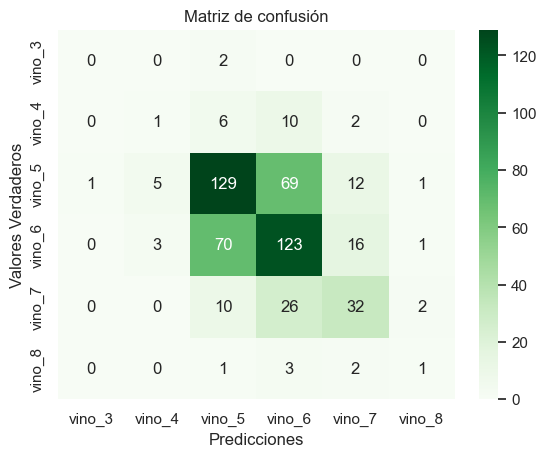

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
classes = ['vino_3', 'vino_4', 'vino_5', 'vino_6', 'vino_7', 'vino_8'] 
sns.heatmap(cm, annot=True, cmap='Greens', xticklabels=classes, yticklabels=classes, fmt='d')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.show()